In [1]:
# Import libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [2]:
# Load the classification model
model = keras.models.load_model('sentiment_analysis')

In [3]:
# Read the data
home_timeline_tweets = pd.read_csv('home_timeline_tweets.csv')
home_timeline_tweets.head()

,tweet_text
0,casual reminder that mental health days are va...
1,that is a wrap a big thank you to our speakers...
2,i want to say to my fellow asian americans who...
3,seattle stands together to stop asian hate end...
4,1 in there has been a marked bias against wome...


In [4]:
# Get sentiment scores of the data and create a new column
home_timeline_tweets['sentiment_score'] = home_timeline_tweets['tweet_text'].apply(lambda x: model.predict(np.array([str(x)])))
home_timeline_tweets['sentiment_score'] = home_timeline_tweets['sentiment_score'].apply(lambda x: x[0][0])

home_timeline_tweets.head(10)

,tweet_text,sentiment_score
0,casual reminder that mental health days are va...,0.128496
1,that is a wrap a big thank you to our speakers...,0.985584
2,i want to say to my fellow asian americans who...,0.002380
3,seattle stands together to stop asian hate end...,0.007828
4,1 in there has been a marked bias against wome...,0.537435
5,one of the best things that happened last year...,0.208716
6,alert misinformation is circulating about our ...,0.534886
7,yup this is me,0.994859
8,a harm against any one of us is a harm against...,0.000022
9,me posts hot sauce making poetry interior desi...,0.028188


Text(0, 0.5, 'frequency')

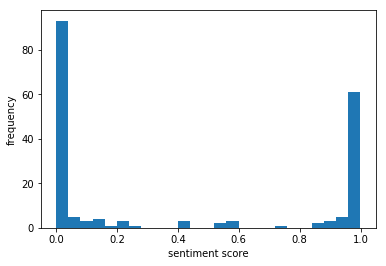

In [5]:
# Plot histogram for results
import matplotlib.pyplot as plt

plt.hist(home_timeline_tweets['sentiment_score'],bins=25)
plt.xlabel('sentiment score')
plt.ylabel('frequency')

In [6]:
# Divide sentiment scores into three category based on the score
def sentiment_category(sentiment_score):
    if sentiment_score <= 0.33:
        category=0
    elif 0.33 < sentiment_score <= 0.66:
        category=1
    else:
        category=2
    return category



In [7]:
# Create new column in dataframe for the sentiment categories
home_timeline_tweets['sentiment_category'] = home_timeline_tweets['sentiment_score'].apply(sentiment_category)

home_timeline_tweets.head(10)

,tweet_text,sentiment_score,sentiment_category
0,casual reminder that mental health days are va...,0.128496,0
1,that is a wrap a big thank you to our speakers...,0.985584,2
2,i want to say to my fellow asian americans who...,0.002380,0
3,seattle stands together to stop asian hate end...,0.007828,0
4,1 in there has been a marked bias against wome...,0.537435,1
5,one of the best things that happened last year...,0.208716,0
6,alert misinformation is circulating about our ...,0.534886,1
7,yup this is me,0.994859,2
8,a harm against any one of us is a harm against...,0.000022,0
9,me posts hot sauce making poetry interior desi...,0.028188,0


Text(0, 0.5, 'frequency')

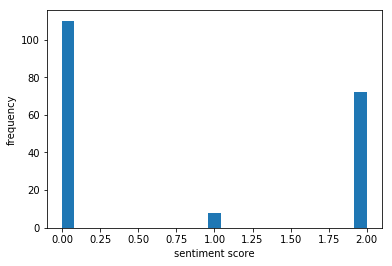

In [8]:
# Plot histogram of the categories
plt.hist(home_timeline_tweets['sentiment_category'],bins=25)
plt.xlabel('sentiment score')
plt.ylabel('frequency')